In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [60]:
# generate random sinsoidal data
def transform(x): return np.sin(2 * np.pi * x)

size = 30
rng = np.random.RandomState(42)
x_train = rng.uniform(0, 1.0, size)
y_train = transform(x_train) + rng.normal(0, 0.1, size)
x_test = np.linspace(0.0, 1.0, 100)
x_train, y_train, x_test[:10]

(array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
        0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258,
        0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
        0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914,
        0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998,
        0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041]),
 array([ 0.59404767, -0.26717564, -1.05367088, -0.61011463,  0.77049045,
         1.01580454,  0.35555296, -0.85097467, -0.51118412, -1.08758485,
         0.14986227, -0.38390468, -1.00162863,  0.99181956,  0.98349636,
         0.93086409,  0.93091805, -0.18503311,  0.26683776,  0.89464926,
        -0.69241484,  0.87419446,  0.999506  ,  0.56812101,  0.30493728,
        -1.01418321,  0.88272893, -0.0281508 , -0.44547414,  0.38085877]),
 array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
        0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909]))

In [61]:
# fit cubic polynomial
X_train = np.vander(x_train, 3+1, increasing=True)
X_test = np.vander(x_test, 3+1, increasing=True)
X_train.shape, X_test.shape

((30, 4), (100, 4))

In [41]:
from sklearn.linear_model import BayesianRidge
reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)

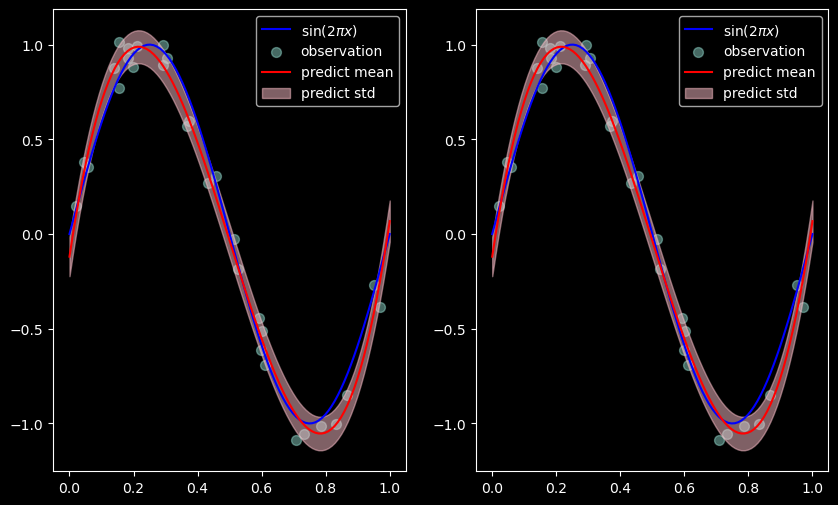

In [67]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

for i, ax in enumerate(axs):
    # fit model with
    init = [1/np.var(y_train), 1.0] if i==0 else [1, 1e-3]
    reg.set_params(alpha_init=init[0], lambda_init=init[1])
    reg.fit(X_train, y_train)
    y_mean, y_std = reg.predict(X_test, return_std=True)

    # graphing
    ax.plot(x_test, transform(x_test), color="blue", label="sin($2\\pi x$)")
    ax.scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
    ax.plot(x_test, y_mean, color="red", label="predict mean")
    ax.fill_between(
        x_test, y_mean - y_std, y_mean + y_std, color="pink", alpha=0.5, label="predict std"
    )
    ax.legend()
plt.show()